<a href="https://colab.research.google.com/github/Krishanu2206/crop-disease-detection/blob/main/CROP_DISEASE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RICE DATASETS

##Installing dependencies


In [ ]:
##checking cuda version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # Returns the name of the GPU
    print(torch.cuda.current_device())    # Returns the current GPU device index
    print(torch.cuda.get_device_capability(0))  # Returns the CUDA capability of the GPU
print(torch.version.cuda)  # Returns the version of CUDA that PyTorch was built with


Tesla T4
0
(7, 5)
12.1


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

##Setting up device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

##Extracting the files from the zip folder


In [ ]:
import os
import requests
import zipfile
from pathlib import Path

#Setting up the folder
data = Path('data/')
image_path = data/'Rice_Image_Dataset'

##if folder exists no need to create else create
if image_path.is_dir():
  print(f'{image_path} already exists')
else:
  print(f'creating {image_path}')
  data.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile('/content/archive (1).zip', 'r') as zip_ref:
  print('extracting data...')
  zip_ref.extractall(image_path)
  print(f'Data extracted and stored in {image_path}')

os.listdir(image_path)

data/Rice_Image_Dataset already exists
extracting data...
Data extracted and stored in data/Rice_Image_Dataset


['train', 'test', 'rice_leaf_diseases']

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')
walk_through_dir(image_path)

There are 3 directories and 0 images in data/Rice_Image_Dataset
There are 3 directories and 0 images in data/Rice_Image_Dataset/train
There are 0 directories and 32 images in data/Rice_Image_Dataset/train/Bacterial leaf blight
There are 0 directories and 32 images in data/Rice_Image_Dataset/train/Leaf smut
There are 0 directories and 32 images in data/Rice_Image_Dataset/train/Brown spot
There are 3 directories and 0 images in data/Rice_Image_Dataset/test
There are 0 directories and 8 images in data/Rice_Image_Dataset/test/Bacterial leaf blight
There are 0 directories and 8 images in data/Rice_Image_Dataset/test/Leaf smut
There are 0 directories and 8 images in data/Rice_Image_Dataset/test/Brown spot
There are 3 directories and 0 images in data/Rice_Image_Dataset/rice_leaf_diseases
There are 0 directories and 40 images in data/Rice_Image_Dataset/rice_leaf_diseases/Bacterial leaf blight
There are 0 directories and 40 images in data/Rice_Image_Dataset/rice_leaf_diseases/Leaf smut
There ar

In [ ]:
target_directory = image_path/'rice_leaf_diseases'
for entry in os.scandir(target_directory):
  if entry.is_dir():
    print(entry.name)
os.listdir(target_directory)

Bacterial leaf blight
Leaf smut
Brown spot


['Bacterial leaf blight', 'Leaf smut', 'Brown spot']

##Splitting into train and test dirs

In [ ]:
import os
import shutil
from pathlib import Path
import random

In [ ]:
target_directory = image_path/'rice_leaf_diseases'
source_dir = target_directory/'Bacterial leaf blight'
train_dir_for_dir1 = image_path/'train'/'Bacterial leaf blight'
test_dir_for_dir1 = image_path/'test'/'Bacterial leaf blight'

##Creating train directory
if train_dir_for_dir1.is_dir():
  print(f'{train_dir_for_dir1} already exists')
else:
  print(f'creating {train_dir_for_dir1}')
  train_dir_for_dir1.mkdir(parents=True, exist_ok=True)

##Creating test directory
if test_dir_for_dir1.is_dir():
  print(f'{test_dir_for_dir1} already exists')
else:
  print(f'creating {test_dir_for_dir1}')
  test_dir_for_dir1.mkdir(parents=True, exist_ok=True)

data/Rice_Image_Dataset/train/Bacterial leaf blight already exists
data/Rice_Image_Dataset/test/Bacterial leaf blight already exists


In [ ]:
##USING FOR LOOP

def create_train_test_dirs():
  target_directory = image_path/'rice_leaf_diseases'
  for entry in os.scandir(target_directory):
    if entry.is_dir():
      print(entry.name)
      source_dir = target_directory/entry.name
      train_dir = image_path/'train'/entry.name
      test_dir = image_path/'test'/entry.name

      ##Creating train directory
      if train_dir.is_dir():
        print(f'{train_dir} already exists')
      else:
        print(f'creating {train_dir}')
        train_dir.mkdir(parents=True, exist_ok=True)

      ##Creating test directory
      if test_dir.is_dir():
        print(f'{test_dir} already exists')
      else:
        print(f'creating {test_dir}')
        test_dir.mkdir(parents=True, exist_ok=True)

create_train_test_dirs()

Bacterial leaf blight
data/Rice_Image_Dataset/train/Bacterial leaf blight already exists
data/Rice_Image_Dataset/test/Bacterial leaf blight already exists
Leaf smut
data/Rice_Image_Dataset/train/Leaf smut already exists
data/Rice_Image_Dataset/test/Leaf smut already exists
Brown spot
data/Rice_Image_Dataset/train/Brown spot already exists
data/Rice_Image_Dataset/test/Brown spot already exists


In [ ]:
images = os.listdir(source_dir)
source_dir,images

(PosixPath('data/Rice_Image_Dataset/rice_leaf_diseases/Bacterial leaf blight'),
 ['DSC_0377.JPG',
  'DSC_0381.JPG',
  'DSC_0372.JPG',
  'DSC_0367.JPG',
  'DSC_0702.jpg',
  'DSC_0392.JPG',
  'DSC_0385.jpg',
  'DSC_0375.JPG',
  'DSC_0384.JPG',
  'DSC_0378.JPG',
  'DSC_0388.JPG',
  'DSC_0701.jpg',
  'DSC_0382.JPG',
  'DSC_0393.JPG',
  'DSC_0389.JPG',
  'DSC_0396.JPG',
  'DSC_0398.JPG',
  'DSC_0386.JPG',
  'DSC_0703.JPG',
  'DSC_0404.JPG',
  'DSC_0403.JPG',
  'DSC_0379.JPG',
  'DSC_0405.JPG',
  'DSC_0366.jpg',
  'DSC_0395.JPG',
  'DSC_0400.JPG',
  'DSC_0397.JPG',
  'DSC_0383.JPG',
  'DSC_0365.JPG',
  'DSC_0401.JPG',
  'DSC_0406.JPG',
  'DSC_0374.JPG',
  'DSC_0370.jpg',
  'DSC_0399.JPG',
  'DSC_0402.JPG',
  'DSC_0380.JPG',
  'DSC_0390.JPG',
  'DSC_0376.JPG',
  'DSC_0700.jpg',
  'DSC_0373.JPG'])

In [ ]:
target_directory = image_path/'rice_leaf_diseases'
source_dir = target_directory/'Bacterial leaf blight'
train_dir_for_dir1 = image_path/'train'/'Bacterial leaf blight'
test_dir_for_dir1 = image_path/'test'/'Bacterial leaf blight'
images = os.listdir(source_dir)

##SPLITTING THE DATA
random.shuffle(images)
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(split_ratio * len(images))
train_images = images[:split_index]
test_images = images[split_index:]

##Transfering images into train and test dirs
for img in train_images:
  shutil.move(os.path.join(source_dir, img), os.path.join(train_dir_for_dir1, img))
  print(f"Train Images created!")
for img in test_images:
  shutil.move(os.path.join(source_dir, img), os.path.join(test_dir_for_dir1, img))
  print(f"Test Images created!")

Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Train Images created!
Test Images created!
Test Images created!
Test Images created!
Test Images created!
Test Images created!
Test Images created!
Test Images created!
Test Images created!


In [ ]:
##USING FOR LOOP

def move_images():
  target_directory = image_path/'rice_leaf_diseases'
  for entry in os.scandir(target_directory):
    if entry.is_dir():
      print(entry.name)
      source_dir = target_directory/entry.name
      train_dir = image_path/'train'/entry.name
      test_dir = image_path/'test'/entry.name
      images = os.listdir(source_dir)

      ##SPLITTING THE IMAGES
      if images:
        random.shuffle(images)
        split_ratio = 0.8  # 80% for training, 20% for testing
        split_index = int(split_ratio * len(images))
        train_images = images[:split_index]
        test_images = images[split_index:]

        ##Transfering images into train and test dirs
        for img in train_images:
          shutil.move(os.path.join(source_dir, img), os.path.join(train_dir, img))
        print(f"Train Images created for {train_dir}!")
        for img in test_images:
          shutil.move(os.path.join(source_dir, img), os.path.join(test_dir, img))
        print(f"Test Images created for {test_dir}!")
      else:
        print(f"No images found in {source_dir}. Skipping...")

move_images()

Bacterial leaf blight
No images found in data/Rice_Image_Dataset/rice_leaf_diseases/Bacterial leaf blight. Skipping...
Leaf smut
Train Images created for data/Rice_Image_Dataset/train/Leaf smut!
Test Images created for data/Rice_Image_Dataset/test/Leaf smut!
Brown spot
Train Images created for data/Rice_Image_Dataset/train/Brown spot!
Test Images created for data/Rice_Image_Dataset/test/Brown spot!


HURRAY!! FINALLY A WORTHY DATASET CREATED !!!

##Visualise the images

In [ ]:
train_dir = image_path/'train'
test_dir = image_path/'test'
str(train_dir), str(test_dir), image_path

('data/Rice_Image_Dataset/train',
 'data/Rice_Image_Dataset/test',
 PosixPath('data/Rice_Image_Dataset'))

In [ ]:
##installing dependencies
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

Random image path : data/Rice_Image_Dataset/train/Leaf smut/DSC_0509.jpg
Image class : Leaf smut
Image height : 897
Image width : 3081


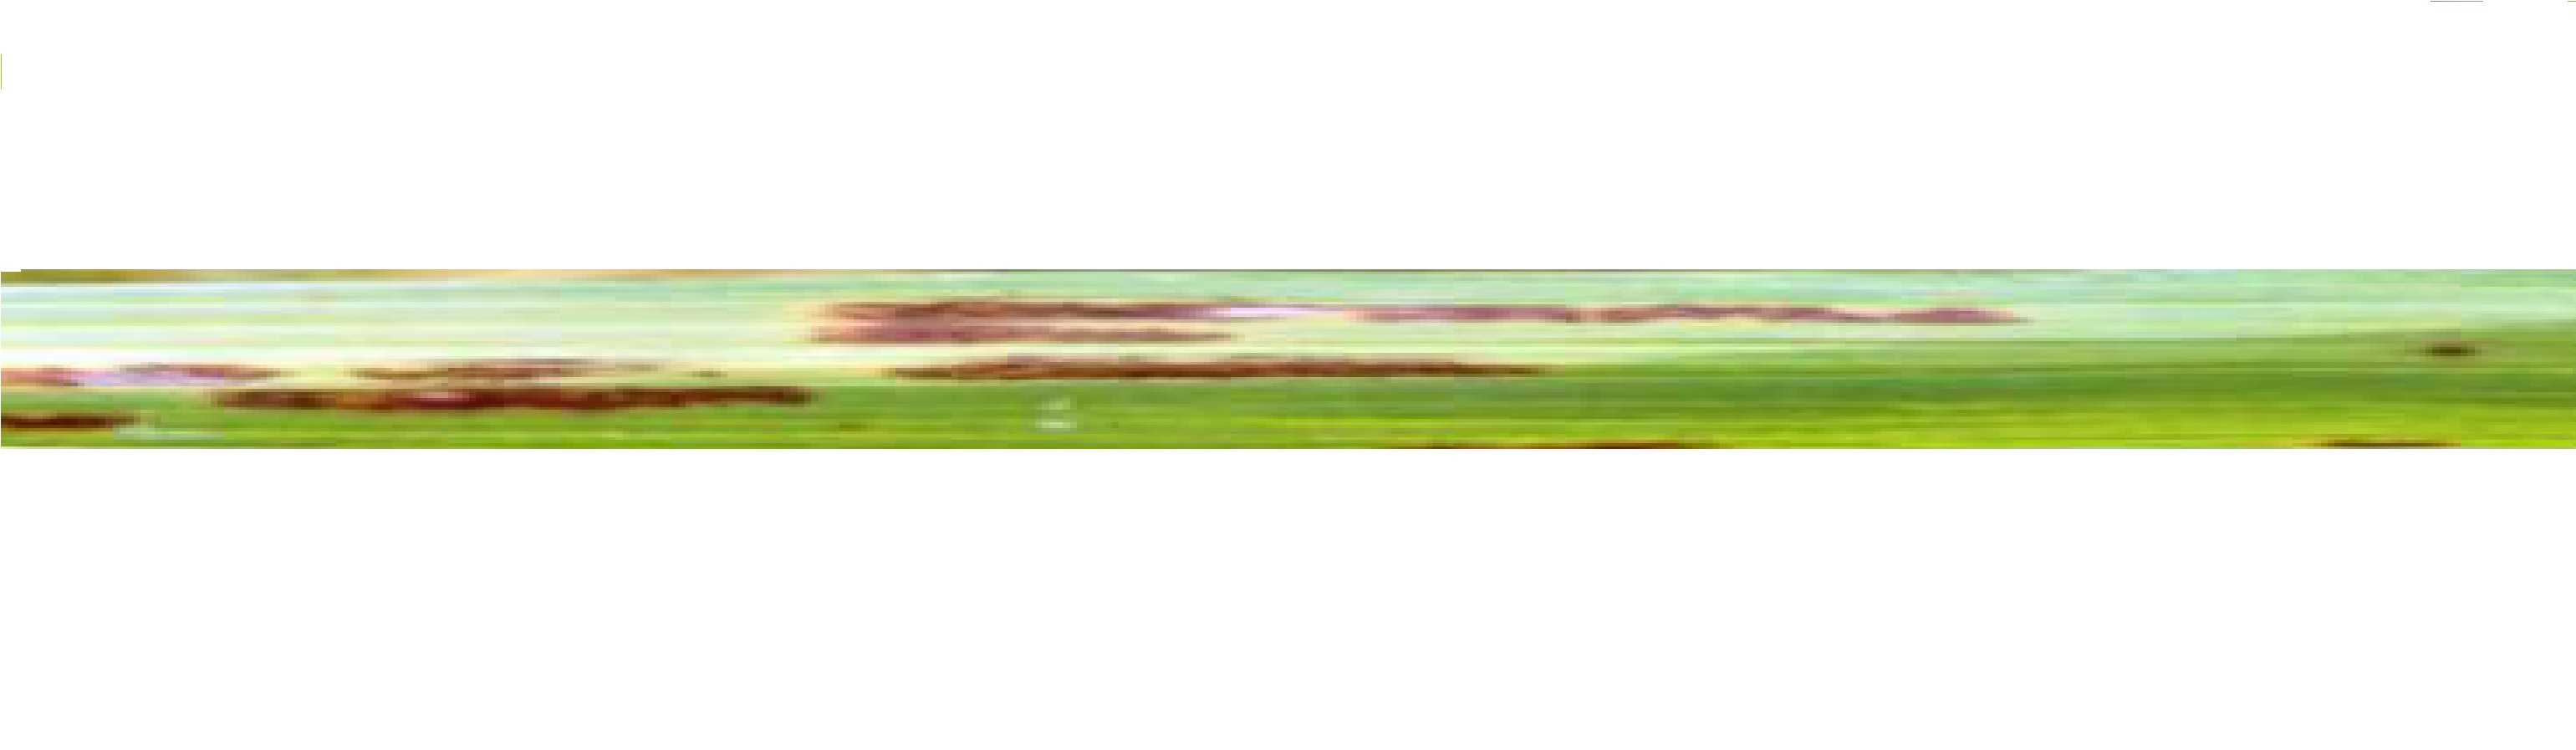

In [ ]:
#SET SEED
random.seed(42)

##GET ALL IMAGE PATHS(* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

##PICK A RANDOM IMAGE
random_image_path = random.choice(image_path_list)

##GET IMAGE CLASS FROM PATH NAME(the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

##OPEN IMAGE
img = Image.open(random_image_path)

##print metadata
print(f"Random image path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")
img

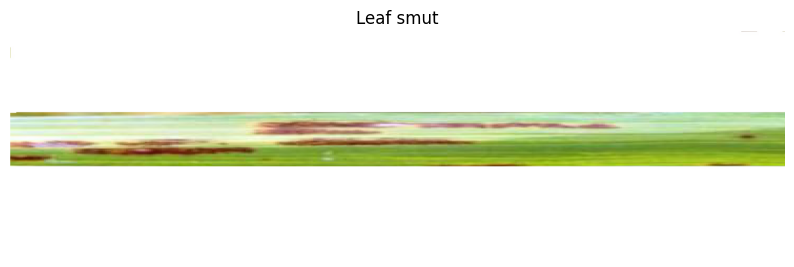

In [ ]:
##USING MATPLOTLIB TO PLOT THE IMAGE
plt.figure(figsize=(10,7))
image_asarray = np.asarray(img)
plt.imshow(image_asarray)
# plt.imshow(img) ##also correct just the axes will not be displayed!
plt.title(image_class)
plt.axis(False)
plt.show()

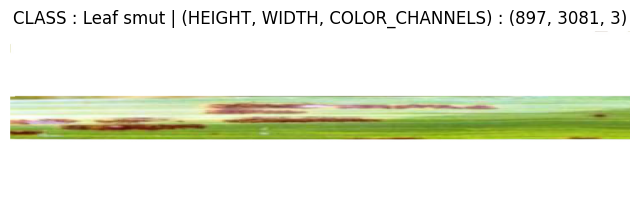

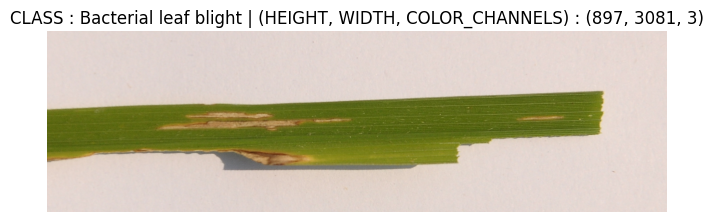

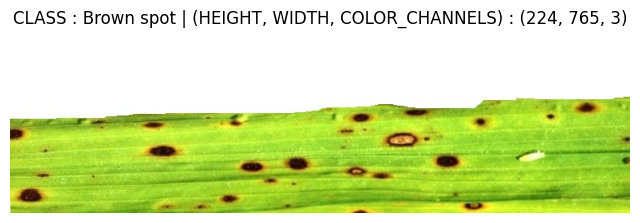

In [ ]:
def plot_random_images(n, image_path):
  #setting up seed
  random.seed(42)

  #get all image paths(* means "any combination")
  image_path_list = list(image_path.glob("*/*/*.jpg"))

  #limit the n
  if n>5:
    n=5

  #pick random images
  random_image_paths = random.sample(image_path_list, k=n)

  #plot images
  for image_path in random_image_paths:
    img = Image.open(image_path)
    image_class = image_path.parent.stem
    plt.figure(figsize=(8,5))
    image_asarray = np.asarray(img)
    plt.imshow(image_asarray)
    plt.title(f"CLASS : {image_class} | (HEIGHT, WIDTH, COLOR_CHANNELS) : {image_asarray.shape}")
    plt.axis(False)
    plt.show()

plot_random_images(n=3, image_path=image_path)

ENOUGH OF VISUALISATION!! NOW LET'S TRANSFORM OUR DATA!!

##TRANSFORMING DATA!

In [ ]:
##installing dependencies
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

WE WILL BE USING AUGMENTED DATA!

In [ ]:
##Creating the data transforms
train_transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.TrivialAugmentWide(),
  transforms.ToTensor()
])

test_transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor()
])

train_transform, test_transform

(Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
 ))

In [ ]:
train_transform(img)

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9922, 0.9137],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9922, 0.9294],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9922],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9922, 0.9059],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9922, 0.9922],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9922, 0.

In [ ]:
train_transform(img).shape ##COLOR_CHANNELS, HEIGHT, WIDTH

torch.Size([3, 224, 224])

In [ ]:
train_dir, test_dir

(PosixPath('data/Rice_Image_Dataset/train'),
 PosixPath('data/Rice_Image_Dataset/test'))

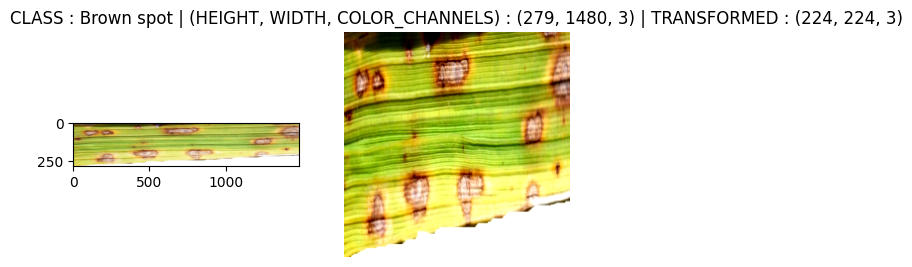

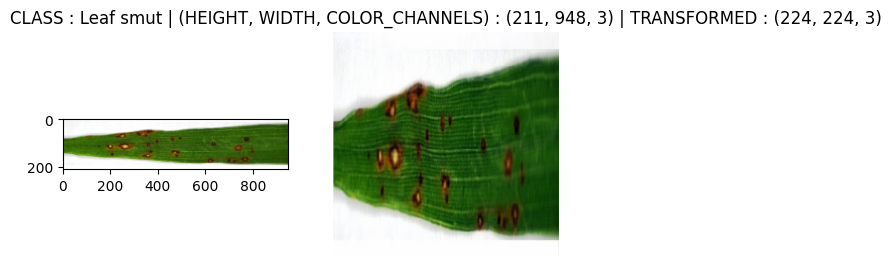

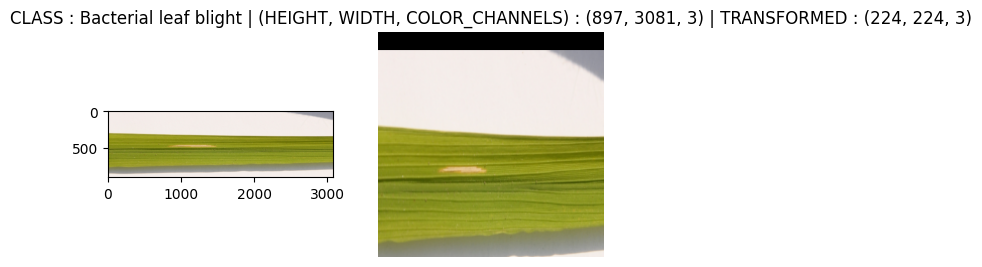

In [ ]:
##lets plot some transformed images
train_image_path_list = list(train_dir.glob("*/*.jpg"))
def plot_transformed_images(image_path, transform, n=3, seed=42):
  ##setting up random seed
  random.seed(seed)
  torch.manual_seed(seed)

  #limit the n
  if(n>3):
    n=3

  #pick random images
  random_image_paths = random.sample(image_path, k=n)

  #plot images
  for image_path in random_image_paths:
    img = Image.open(image_path)
    if transform:
      transformed_img = transform(img)
    else:
      transformed_img = img
    image_class = image_path.parent.stem
    plt.subplot(1,2,1)
    image_asarray = np.asarray(img)
    plt.imshow(image_asarray)
    plt.subplot(1,2,2)
    transformed_image_asarray = np.asarray(transformed_img.permute(1,2,0)) ##[C,H,W] => [H,W,C]
    plt.imshow(transformed_image_asarray)
    plt.title(f"CLASS : {image_class} | (HEIGHT, WIDTH, COLOR_CHANNELS) : {image_asarray.shape} | TRANSFORMED : {transformed_image_asarray.shape}")
    plt.axis(False)
    plt.show()

plot_transformed_images(train_image_path_list, transform=train_transform)

##Turning the data into datasets using `ImageFolder` from `datasets` from `torchvision`

In [ ]:
##turning the data into datasets using ImageFolder
from torchvision import datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transform, target_transform=None)
test_data = datasets.ImageFolder(test_dir, transform=test_transform, target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 115
     Root location: data/Rice_Image_Dataset/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 43
     Root location: data/Rice_Image_Dataset/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
len(train_data), len(test_data), range(len(train_data))

(115, 43, range(0, 115))

In [ ]:
class_names = train_data.classes

In [ ]:
class_to_idx = train_data.class_to_idx

In [ ]:
targets =train_data.targets

In [ ]:
##taking the first image nd label of the train data
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.9608, 0.9529, 0.9529,  ..., 0.9686, 0.9608, 0.9608],
          [0.9490, 0.9529, 0.9608,  ..., 0.9608, 0.9686, 0.9686],
          [0.9529, 0.9608, 0.9608,  ..., 0.9529, 0.9608, 0.9686],
          ...,
          [0.9608, 0.9529, 0.9529,  ..., 0.9490, 0.9490, 0.9490],
          [0.9608, 0.9529, 0.9608,  ..., 0.9529, 0.9529, 0.9529],
          [0.9608, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529]],
 
         [[0.9686, 0.9647, 0.9569,  ..., 0.9647, 0.9686, 0.9686],
          [0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9765, 0.9686],
          [0.9647, 0.9686, 0.9569,  ..., 0.9647, 0.9686, 0.9686],
          ...,
          [0.9686, 0.9686, 0.9765,  ..., 0.9686, 0.9686, 0.9569],
          [0.9686, 0.9647, 0.9765,  ..., 0.9686, 0.9686, 0.9647],
          [0.9647, 0.9647, 0.9765,  ..., 0.9647, 0.9686, 0.9647]],
 
         [[0.9686, 0.9647, 0.9686,  ..., 0.9686, 0.9725, 0.9725],
          [0.9647, 0.9686, 0.9686,  ..., 0.9686, 0.9725, 0.9725],
          [0.9686, 0.9686, 0.9686,  ...,

In [ ]:
img.shape, type(label), type(img)

(torch.Size([3, 224, 224]), int, torch.Tensor)

In [ ]:
##PRINT OUT EVERYTHING
print(f"Length of train data : {len(train_data)}")
print(f"Length of test data : {len(test_data)}")
print(f"Class names : {train_data.classes}")
print(f"Class to index : {train_data.class_to_idx}")
print(f"First 10 targets : {train_data.targets[:10]}")
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape : {img.shape}")
print(f"First image Label : {label}")
print(f"First image class : {train_data.classes[label]}")

Length of train data : 115
Length of test data : 43
Class names : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
Class to index : {'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
First 10 targets : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Image shape : torch.Size([3, 224, 224])
First image Label : 0
First image class : Bacterial leaf blight


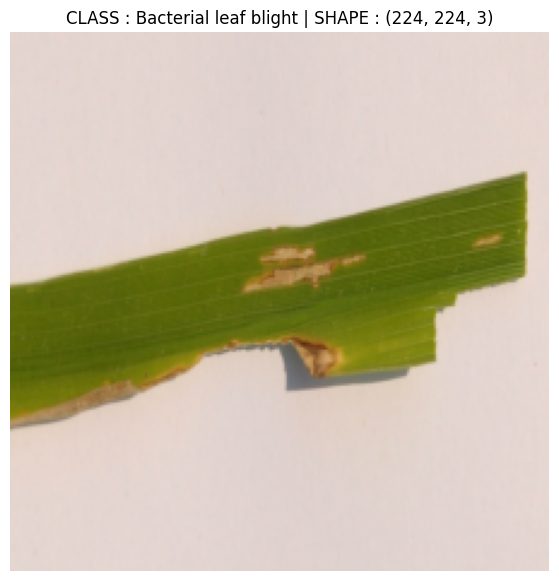

In [ ]:
plt.figure(figsize=(10,7))
image_asarray = np.asarray(img.permute(1,2,0))
plt.imshow(image_asarray)
plt.title(f"CLASS : {class_names[label]} | SHAPE : {image_asarray.shape}")
plt.axis(False)
plt.show()

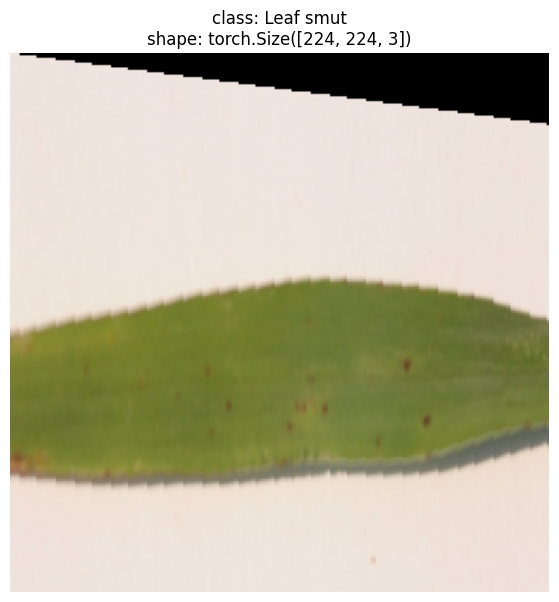

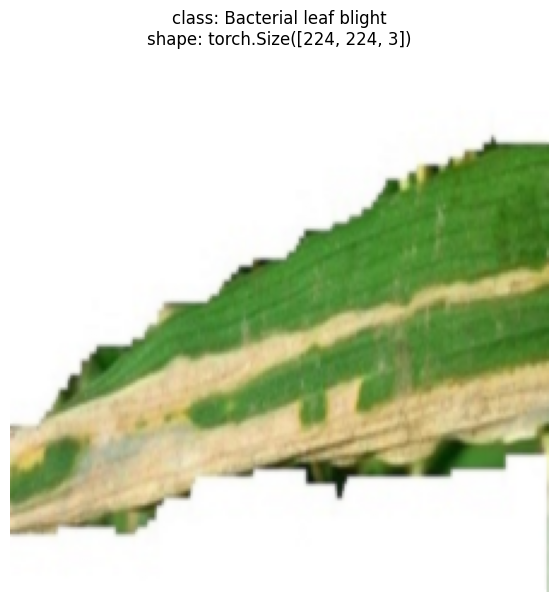

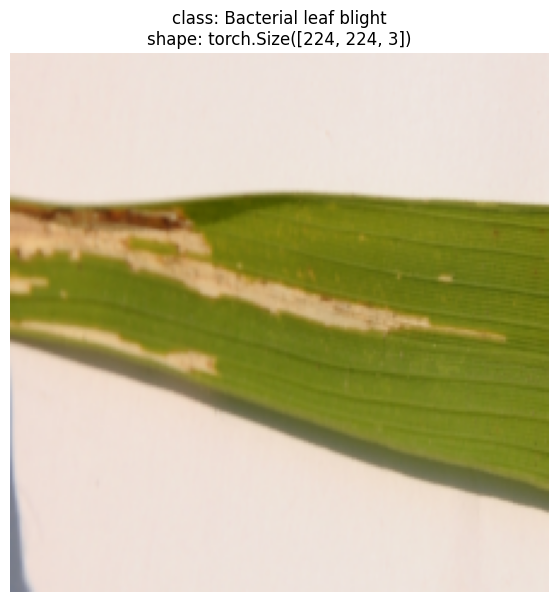

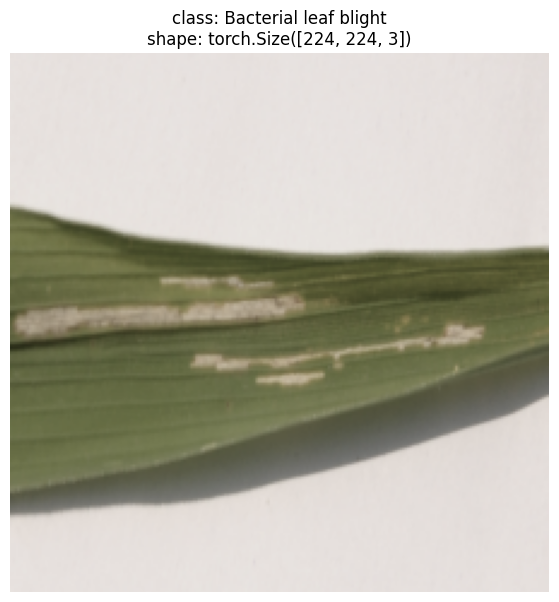

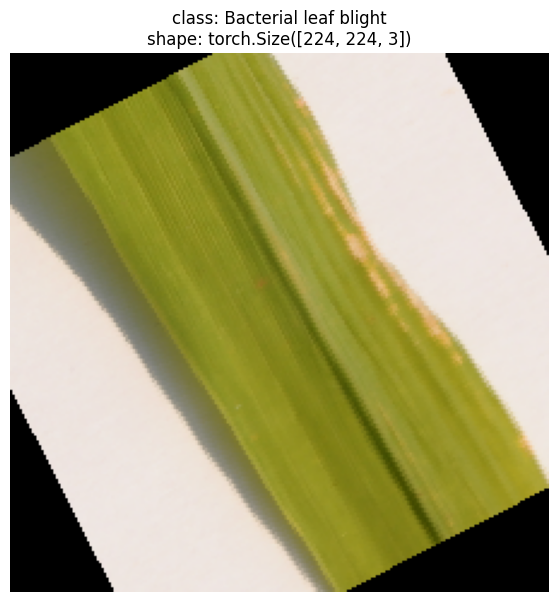

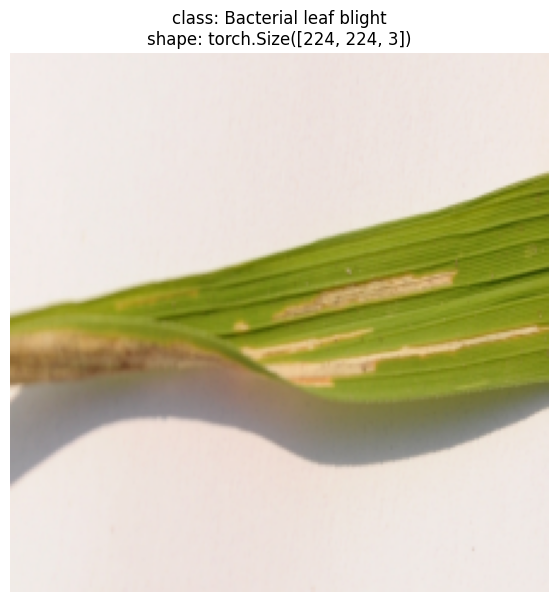

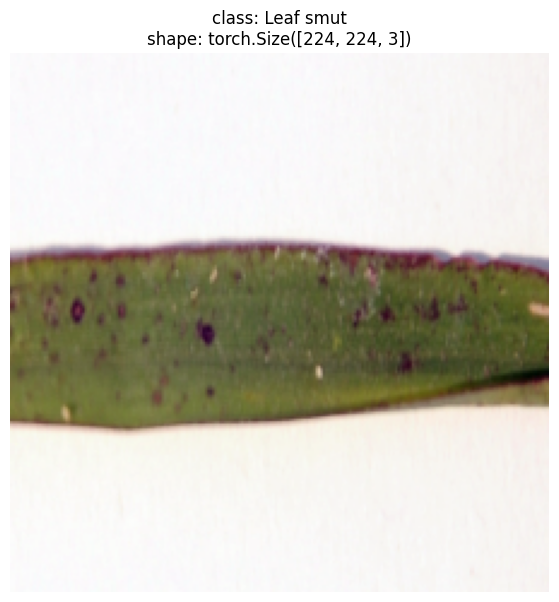

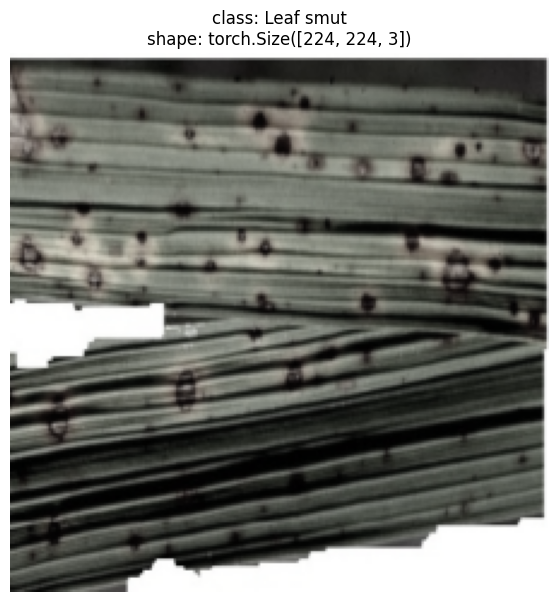

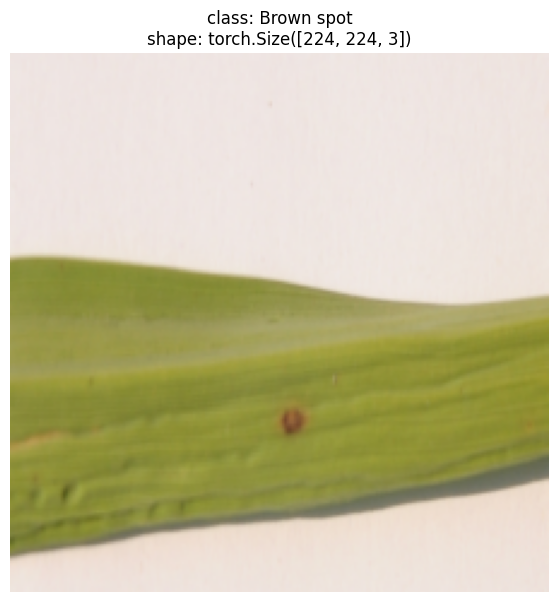

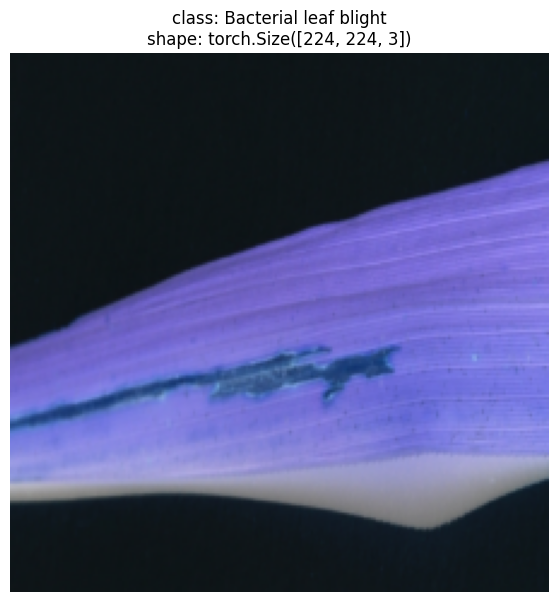

In [ ]:
##VISUALISE!!!
##Create a function to take in a dataset
def display_random_images_from_datasets(dataset: torch.utils.data.Dataset,
                                        classes,
                                        n: int = 10,
                                        display_shape: bool = True,
                                        seed: int = None):
  #Adjust display if n is too high
  if n>10:
    n=10
    display_shape = False
    print(f"Value of n too high, resetting to {n}")

  #Set the random seed
  if seed:
    random.seed(seed)

  #Get random sample images
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  #loop through the random indexes
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample]

    #Perform some operations on the image by adjusting tensor dimensions from [CHW] to [HWC]
    targ_image_adjust = targ_image.permute(1, 2, 0)

    #Plot the adjusted image
    plt.figure(figsize=(10,7))
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title += f"\nshape: {targ_image_adjust.shape}"
    else:
      title = f"label: {targ_label}"
    plt.title(title)

display_random_images_from_datasets(train_data, classes=class_names)

##Turning the image datasets into `DataLoaders` for them being iterable

In [ ]:
#installing dependencies
from torch.utils.data import DataLoader

In [ ]:
os.cpu_count()

2

In [ ]:
#turning datasets into iterables using DataLoader
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ed3d8f5df90>,
 <torch.utils.data.dataloader.DataLoader at 0x7ed3d3eba140>)

In [ ]:
print(f"Dataloader train batches : {len(train_dataloader)}")
print(f"Dataloader test batches : {len(test_dataloader)}")

Dataloader train batches : 8
Dataloader test batches : 3


Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])


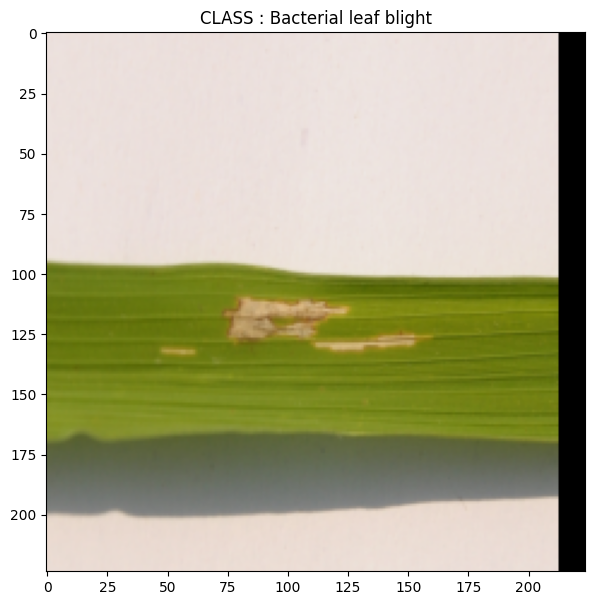

Label: 0
CLASS : Bacterial leaf blight


In [ ]:
##iterating over the dataloaders
# Display image and label. Visualise!!
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.shape}")
print(f"Labels batch shape: {train_labels.shape}")
img = train_features[2].squeeze().permute(1,2,0)
label = train_labels[2]
plt.figure(figsize=(10,7))
plt.imshow(img, cmap="gray")
plt.title(f"CLASS : {class_names[label]}")
plt.show()
print(f"Label: {label}")
print(f"CLASS : {class_names[label]}")

In [ ]:
list(range(len(train_dataloader)))

[0, 1, 2, 3, 4, 5, 6, 7]

##LETS CREATE OUR MODEL!!

In [ ]:
from torch import nn

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    # self.conv_block_3= nn.Sequential(
    #     nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
    #     nn.ReLU(),
    #     nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
    #     nn.ReLU(),
    #     nn.MaxPool2d(kernel_size=2, stride=2)
    # )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=179776, out_features=output_shape)
    )

  def forward(self, x):
    # print(x.shape)
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [ ]:
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
#create an instance of the model
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, hidden_units=64, output_shape=len(class_names))
model_1.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=179776, out_features=3, bias=True)
  )
)

MODEL CREATED!!

In [ ]:
##TRY FORWARD PASS ON A SINGLE BATCH TO TEST THE MODEL!
img_batch, label_batch = next(iter(train_dataloader))
y_logits = model_1(img_batch.to(device))
y_logits

tensor([[-0.0264, -0.0138,  0.0219],
        [-0.0300, -0.0171,  0.0284],
        [-0.0276, -0.0129,  0.0315],
        [-0.0155, -0.0130,  0.0181],
        [-0.0235, -0.0174,  0.0231],
        [-0.0183, -0.0188,  0.0201],
        [-0.0192, -0.0245,  0.0163],
        [-0.0249, -0.0210,  0.0213],
        [-0.0231, -0.0187,  0.0214],
        [-0.0237, -0.0218,  0.0224],
        [-0.0171, -0.0126,  0.0203],
        [-0.0254, -0.0241,  0.0214],
        [-0.0131, -0.0159,  0.0139],
        [-0.0261, -0.0126,  0.0278],
        [-0.0200, -0.0138,  0.0247],
        [-0.0236, -0.0232,  0.0217]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
##logits -> pred probs -> pred labels
pred_probs = torch.softmax(y_logits, dim=1)
pred_labels = torch.argmax(pred_probs, dim=1)
pred_labels, label_batch

(tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'),
 tensor([2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0]))

In [ ]:
pred_probs

tensor([[0.3266, 0.3307, 0.3427],
        [0.3254, 0.3296, 0.3450],
        [0.3251, 0.3300, 0.3449],
        [0.3293, 0.3301, 0.3405],
        [0.3275, 0.3295, 0.3431],
        [0.3291, 0.3289, 0.3420],
        [0.3299, 0.3282, 0.3419],
        [0.3277, 0.3290, 0.3432],
        [0.3279, 0.3293, 0.3428],
        [0.3280, 0.3286, 0.3434],
        [0.3287, 0.3301, 0.3412],
        [0.3280, 0.3284, 0.3437],
        [0.3306, 0.3297, 0.3397],
        [0.3258, 0.3303, 0.3439],
        [0.3277, 0.3297, 0.3426],
        [0.3282, 0.3284, 0.3434]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

##USING `torchinfo`

In [ ]:
##Install torchinfo
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from  torchinfo import summary
summary(model_1, input_size=[16, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [16, 3]                   --
├─Sequential: 1-1                        [16, 64, 110, 110]        --
│    └─Conv2d: 2-1                       [16, 64, 222, 222]        1,792
│    └─ReLU: 2-2                         [16, 64, 222, 222]        --
│    └─Conv2d: 2-3                       [16, 64, 220, 220]        36,928
│    └─ReLU: 2-4                         [16, 64, 220, 220]        --
│    └─MaxPool2d: 2-5                    [16, 64, 110, 110]        --
├─Sequential: 1-2                        [16, 64, 53, 53]          --
│    └─Conv2d: 2-6                       [16, 64, 108, 108]        36,928
│    └─ReLU: 2-7                         [16, 64, 108, 108]        --
│    └─Conv2d: 2-8                       [16, 64, 106, 106]        36,928
│    └─ReLU: 2-9                         [16, 64, 106, 106]        --
│    └─MaxPool2d: 2-10                   [16, 64, 53, 53]          --


##CREATE A TRAIN AND TEST STEP

In [ ]:
##setting up the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.1)

In [ ]:
##TRAINING STEP
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer):

  ##Putting the model in the train mode
  model.train()

  ##setting up loss and accuracy
  train_loss=0
  train_accuracy=0

  ##loop through the dataloader
  for batch, (X, y) in enumerate(dataloader): ##X = train_features, y=train_labels
    #transfer X, y to the device
    X, y = X.to(device), y.to(device)

    ##forward pass
    y_logits = model(X)

    ##calculate the loss
    loss = loss_fn(y_logits, y)
    train_loss += loss

    ##calculate the accuracy
    pred_probs = torch.softmax(y_logits, dim=1)
    pred_labels = torch.argmax(pred_probs, dim=1)
    train_accuracy += (pred_labels==y).sum().item()/len(pred_labels)

    ##optimizer zero grad
    optimizer.zero_grad()

    ##loss backward
    loss.backward()

    ##optimizer step
    optimizer.step()

  ##calculate the net train loss and accuracy
  train_loss /= len(dataloader)
  train_accuracy /= len(dataloader)

  return train_loss, train_accuracy


In [ ]:
##TEST STEP
def test_step(model : torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module):
  #putting the model to eval mode
  model.eval()

  ##setting up test loss and accuracy
  test_loss, test_accuracy = 0, 0

  ##turn on inference mode
  with torch.inference_mode():
    ##loop through the dataloader
    for batch, (X, y) in enumerate(dataloader):
      #transfer X, y to the device
      X, y = X.to(device), y.to(device)

      ##forward pass
      test_logits = model(X)
      test_probs = torch.softmax(test_logits, dim=1)
      test_labels = torch.argmax(test_probs, dim=1)

      ##calculate the loss
      loss = loss_fn(test_logits, y)
      test_loss += loss

      ##calculate the accuracy
      test_accuracy += (test_labels==y).sum().item()/len(test_labels)

    ##calculate the net test loss and accuracy
    test_loss /= len(dataloader)
    test_accuracy /= len(dataloader)

    return test_loss, test_accuracy

##CREATE A `train()` FUNCTION TO COMBINE THE `train` AND `test` STEP

In [ ]:
##creating a train function to combine the train and test step
from tqdm.auto import tqdm
def train(model : torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
          loss_fn : torch.nn.Module,
          optimizer : torch.optim.Optimizer,
          epochs : int = 5):

  ##creating a results dictionary
  results = {"train_loss" : [],
             "train_accuracy" : [],
             "test_loss" : [],
             "test_accuracy" : []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_accuracy = train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer)
    test_loss, test_accuracy = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn)

    ##print out the results
    print(f"Epoch : {epoch+1} | train_loss : {train_loss:.4f} | train_accuracy : {train_accuracy:.4f} | test_loss : {test_loss:.4f} | test_accuracy : {test_accuracy}")

    ##update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_accuracy"].append(train_accuracy)
    results["test_loss"].append(test_loss)
    results["test_accuracy"].append(test_accuracy)

  return results

##TRAIN THE MODEL

In [ ]:
##setting up the random seed
torch.manual_seed(42)
random.seed(42)

##start the timer
from timeit import default_timer as timer
start_time = timer()

##train the model
model_1_results = train(model=model_1, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, epochs=10)

end_time = timer()
print(f"Total training time : {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 1 | train_loss : 28898780.0000 | train_accuracy : 0.3021 | test_loss : 381786.5000 | test_accuracy : 0.5
Epoch : 2 | train_loss : 87575.4219 | train_accuracy : 0.4062 | test_loss : 1.1771 | test_accuracy : 0.25
Epoch : 3 | train_loss : 1.1149 | train_accuracy : 0.3333 | test_loss : 1.1690 | test_accuracy : 0.25
Epoch : 4 | train_loss : 1.1123 | train_accuracy : 0.3333 | test_loss : 1.1404 | test_accuracy : 0.25
Epoch : 5 | train_loss : 131.8235 | train_accuracy : 0.3438 | test_loss : 1.1111 | test_accuracy : 0.25
Epoch : 6 | train_loss : 1.5093 | train_accuracy : 0.3229 | test_loss : 1.0911 | test_accuracy : 0.5
Epoch : 7 | train_loss : 1.1010 | train_accuracy : 0.3333 | test_loss : 1.0827 | test_accuracy : 0.5
Epoch : 8 | train_loss : 1.1020 | train_accuracy : 0.3333 | test_loss : 1.0866 | test_accuracy : 0.5
Epoch : 9 | train_loss : 1.1023 | train_accuracy : 0.2812 | test_loss : 1.0979 | test_accuracy : 0.25
Epoch : 10 | train_loss : 1.1003 | train_accuracy : 0.2812 | test_lo